In [12]:
import pandas as pd
import pyodbc
import numpy as np
from keras.layers import Embedding
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt



In [15]:
#Grab data from a database

def getData(Server, UID, PWD, Database, query):    
    
    #create a SQL connection based on the given server and database
    sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                              'SERVER='+Server+';'
                              'DATABASE='+ Database +';'
                              'UID='+UID+';'
                              'PWD='+PWD+';')
    
    #return the data from the given Query and SQL connection,
    #here i hard coded the index so all queries must select examCode
    #for other instances just simply change or remove depending on use
    return pd.read_sql(query, sql_conn, index_col ="examCode")

In [16]:
def generateLabelsList(df):
    return np.hsplit(df,2)

In [17]:
def generateWordIndex(df):
    return df.sectionValue.str.split(expand=True).stack().value_counts()

In [18]:
def generateReport(word_index, label):
    print(word_index[:25])
    x = np.arange(len(word_index[:25]))
    plt.bar(x, height= word_index.values[:25])
    plt.xticks(x, word_index.index[:25], rotation=80)
    
    plt.title(label)
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()
    
    

In [19]:
query = "SELECT examCode, sectionValue FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 540 ) ORDER BY examCode"
server ='GSDEMO2HOST'
database = 'MClinical'
UID = 'gsanalytics'
PWD = 'G3st@lt'
data = getData(server, UID, PWD, database, query)
query = "SELECT DISTINCT examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 540 ) ORDER BY examCode"
unique_labels = getData(server, UID, PWD, database, query)

*APPO 

-                    1002
Acute                 524
Appendix,             492
appendectomy:         431
and                   418
appendicitis          410
with                  204
periappendicitis.     171
appendicitis.         164
Appendix:             142
of                    138
DS:mfr                129
acute                 122
MWD:jcc:C2NR          112
benign.               104
periappendicitis,      95
suppurative            94
serositis.             83
No                     68
for                    68
the                    67
excision:              61
evidence               51
TMF:jcc:C2NR           47
or                     45
dtype: int64


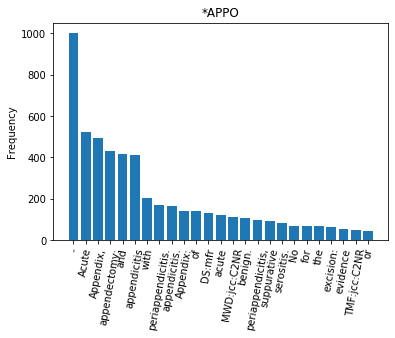



*COL-P 

-               977
of              349
dysplasia       313
Colon,          276
malignancy.     268
high-grade      263
or              243
Tubular         237
adenoma.        223
biopsy:         211
polyp           193
evidence        175
polypectomy:    173
for             166
cm,             165
at              156
is              156
no              145
There           142
and             112
Negative        112
polyp.           87
Hyperplastic     86
fragments        85
TWK:slh:C2NR     84
dtype: int64


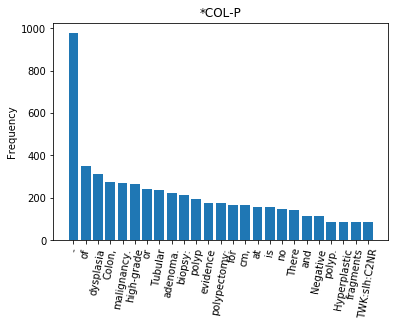



*GALLB 

-                   2017
Gallbladder,         880
cholecystectomy:     789
and                  590
cholecystitis        494
Chronic              438
chronic              368
Cholelithiasis.      356
with                 333
cholecystitis.       324
cholelithiasis.      259
of                   210
DS:mfr               191
No                   185
Gallbladder:         184
Acute                166
Mild                 131
evidence             128
MWD:jcc:C2NR         122
benign.              113
cholesterolosis.     107
or                   107
malignancy.          103
Cholesterolosis.     102
lymph                 93
dtype: int64


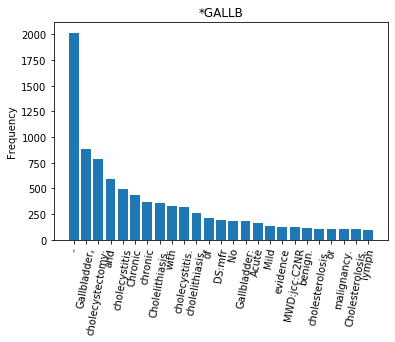



*PLAC 

-                  3451
and                1232
with               1204
umbilical           985
of                  984
placenta            953
cord                798
acute               662
inflammatory        650
for                 650
Mild                601
villous             598
the                 574
chorionic           556
showing:            482
trivascular         476
The                 453
INTERPRETATION:     446
is                  436
are                 429
villi               428
maturation.         407
MWD:jcc:C2NR        401
Term                399
meconium            390
dtype: int64


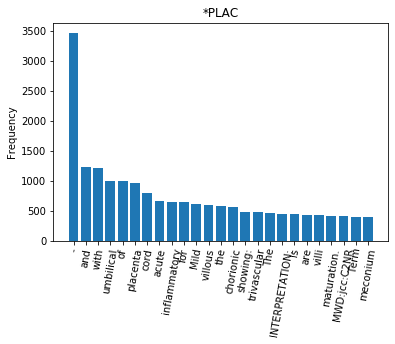



+CDH 

diagnosis;       1468
technical        1468
No               1468
only             1468
performed        1467
NO                  1
IN                  1
THE                 1
perforP@T!3NT       1
N@M3ed              1
IS                  1
CONTAINER.          1
IDENTIFIED          1
SPECIMEN            1
dtype: int64


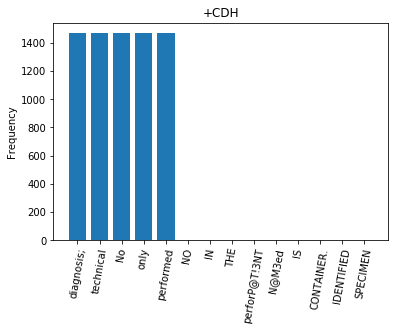



+KBR 

No                     1550
only                   1550
diagnosis;             1550
performed              1550
technical              1549
and                      18
-                        17
Skin,                    15
biopsy:                  14
This                     10
lateral                  10
Dermatopathologist.       9
dictated                  9
has                       9
by                        9
been                      9
reviewed                  9
case                      9
left                      8
at                        8
present                   7
Webb,                     7
punch                     7
R.                        7
shave                     7
dtype: int64


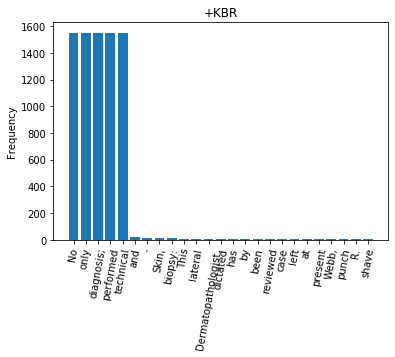



+RMS 

performed     578
No            578
only          578
diagnosis;    578
technical     578
dtype: int64


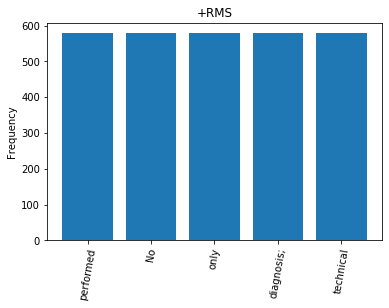



+RSH 

No                     5244
diagnosis;             5243
performed              5242
only                   5238
technical              5237
-                        92
Skin,                    67
biopsy:                  59
and                      58
shave                    52
by                       47
reviewed                 46
case                     44
has                      43
This                     43
been                     43
dictated                 42
Dermatopathologist.      42
at                       31
right                    31
Webb,                    30
R.                       30
Alden                    30
D.O.,                    30
Board-Certified          30
dtype: int64


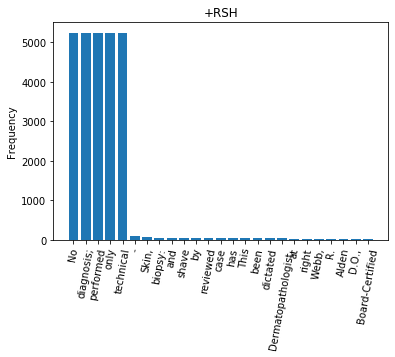



+SKO1 

No                1815
only              1814
diagnosis;        1814
performed         1813
technical         1801
P@T!3NT             11
N@M3echnical        10
N@M3nical            2
perforP@T!3NT        2
tecP@T!3NT           2
N@M3                 2
N@M3ed               2
N@M3nosis;           1
performP@T!3NT       1
N@M3al               1
N@M3y                1
techP@T!3NT          1
onP@T!3NT            1
oP@T!3NT             1
N@M3o                1
diagP@T!3NT          1
N@M3hniP@T!3NT       1
N@M3ical             1
teP@T!3NT            1
N@M3ly               1
dtype: int64


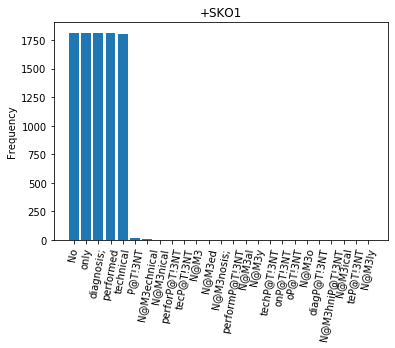



+SLD 

diagnosis;             1447
No                     1447
only                   1447
technical              1446
performed              1445
IS                        3
-                         2
TIFFANY                   1
11/17/16                  1
Examination).             1
Ph.D.,                    1
deep                      1
N@M3med                   1
N@M3foP@T!3NT             1
Dermatopathologist.       1
This                      1
focally                   1
Dermatofibroma;           1
Zhang,                    1
N@M3hniP@T!3NT            1
AN                        1
N@M3ed                    1
AND                       1
left                      1
cage,                     1
dtype: int64


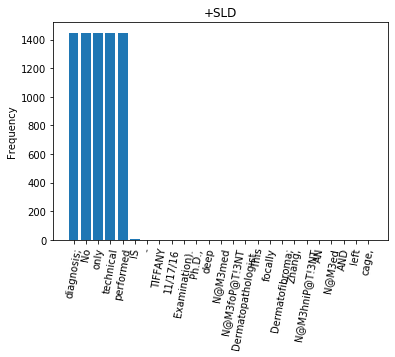



ANT-BX 

-               11586
for              5419
Negative         4566
with             3721
biopsy:          3502
and              2798
mucosa           2781
or               2507
intestinal       2249
chronic          2012
antrum,          1995
malignancy.      1994
dysplasia        1850
Stomach,         1845
Gastric          1671
by               1589
A.               1498
pylori           1447
B.               1431
metaplasia,      1287
gastric          1230
H.               1220
Helicobacter     1188
of                953
mild              918
dtype: int64


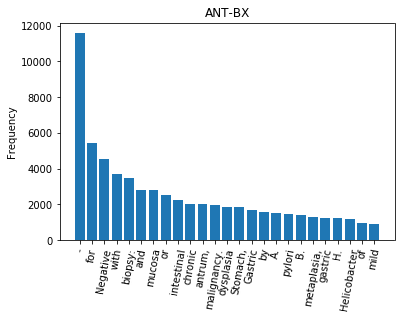



APPO 

-                    3343
Appendix,            2116
appendectomy:        2000
Acute                1898
appendicitis         1342
and                  1340
with                  924
appendicitis.         693
periappendicitis.     675
acute                 359
suppurative           357
of                    343
serositis.            321
DS:mfr                252
for                   242
the                   221
Appendix:             196
inflammation          189
JDM:dks               172
Negative              169
transmural            161
periappendicitis      156
periappendicitis,     151
JVR:smh:C2NR          137
MWD:jcc:C2NR          136
dtype: int64


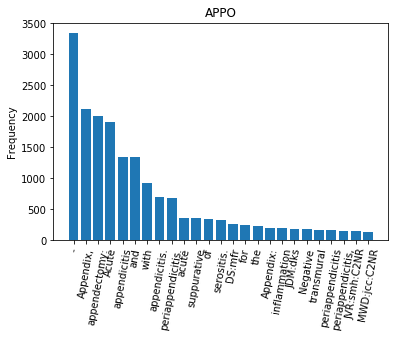



BEL-PROS6BX 

-                  12278
prostatic           3747
of                  3580
Tumor               3447
tissue.             3082
Benign              2804
Left                2229
Right               2224
apex:               1482
base:               1481
mid:                1479
Prostatic           1234
Gleason             1191
Perineural          1186
invasion:           1179
quantitation:       1166
involves            1130
Longest             1089
confluent           1076
length              1056
in                  1041
tumor:              1026
mm.                 1026
adenocarcinoma.      975
present              943
dtype: int64


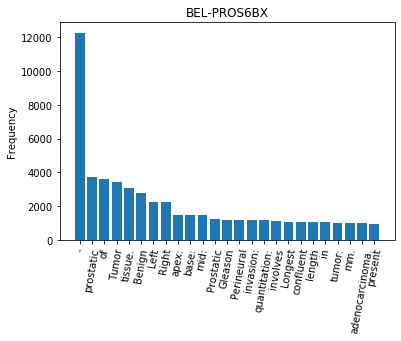



BONEF-O 

-                1086
and               733
with              691
Bone              479
cartilage         469
degenerative      412
features.         335
knee              322
contents:         304
Right             259
Left              239
bone              211
IRG:glc:C2NR      150
present.          147
or                127
tissue            121
for               120
of                119
hematopoietic     115
Negative          107
right             105
elements          105
Bone,             102
Unremarkable       98
left               93
dtype: int64


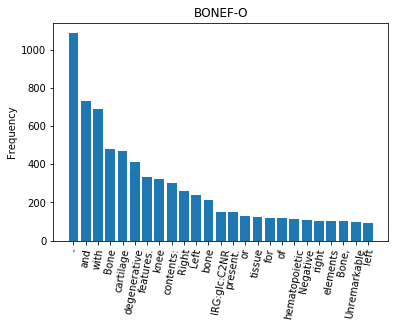



CL-ANT-BX 

-                6337
for              3120
Negative         3086
biopsy:          2455
with             1801
dysplasia.       1791
or               1595
metaplasia       1483
intestinal       1112
chronic          1038
Stomach,         1032
mucosa           1025
B.               1003
A.               1003
Esophagus,       1002
Helicobacter      886
esophagitis       864
and               859
Barrett's         851
antrum,           809
atrophy,          780
distal,           691
cell              664
goblet            663
inflammation,     623
dtype: int64


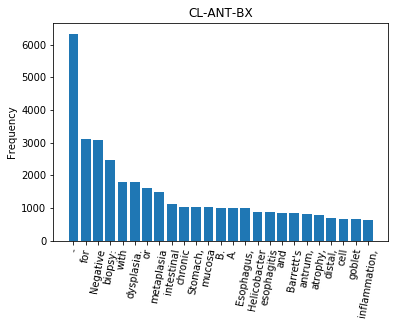



CL-COL-P 

-               7020
Colon,          4579
polypectomy:    4398
adenoma.        3812
Tubular         3167
A.              1505
B.              1503
polyp.          1198
"polyp":        1102
colon           1036
dysplasia.      1032
Hyperplastic    1014
No               937
C.               937
high-grade       812
descending,      712
serrated         704
transverse,      609
ascending,       605
for              593
with             546
Negative         540
BMH:glc:C2NR     534
D.               512
hyperplastic     506
dtype: int64


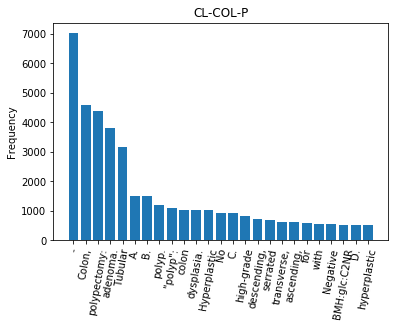



CL-COLBX 

-               3470
Colon,          1469
for             1201
Negative        1184
biopsy:         1136
or               971
with             937
colonic          789
colitis.         728
chronic          638
mucosa           628
mucosa.          523
dysplasia.       517
acute,           501
A.               487
B.               486
inflammatory     475
random,          449
microscopic      438
colon            426
polypectomy:     422
Benign           395
Colonic          352
biopsies:        352
adenoma.         344
dtype: int64


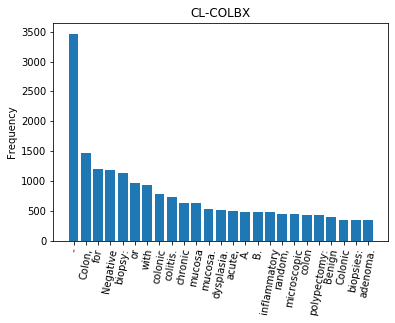



CL-DUOBX 

-                8793
for              4155
Negative         4113
biopsy:          3500
or               2778
with             2300
dysplasia.       1874
metaplasia       1607
mucosa           1527
inflammation,    1413
intestinal       1164
B.               1148
A.               1147
Duodenum,        1111
chronic          1103
second           1097
C.               1077
mucosa.          1075
Stomach,         1057
and               938
Helicobacter      917
Esophagus,        906
Barrett's         876
portion,          868
Normal            840
dtype: int64


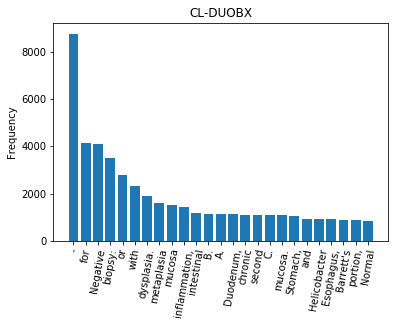



CL-SIG-P 

-               1065
polypectomy:     711
Colon,           678
polyp.           456
Hyperplastic     425
sigmoid,         400
adenoma.         356
Tubular          275
colon            207
Sigmoid          178
B.               149
A.               148
BMH:glc:C2NR     136
"polyp":         134
BMH:smn:C2NR     128
hyperplastic     117
sigmoid          101
for               91
with              86
Negative          83
dysplasia.        80
BMH:slh:C2NR      80
mucosa            73
C.                65
high-grade        64
dtype: int64


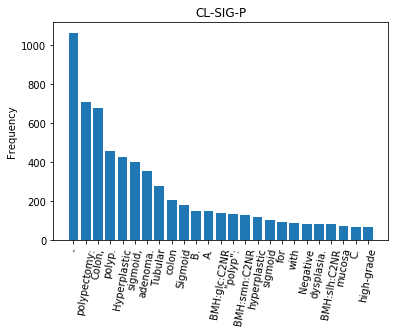



COL-P 

-               27063
Tubular          8739
adenoma.         8605
biopsy:          7685
polyp,           7111
polypectomy:     6652
of               5688
Colon,           5131
A.               4845
B.               4709
colon            4676
for              4449
and              4389
Negative         3477
Colon            3414
polyp.           3208
Fragments        2991
dysplasia        2931
Hyperplastic     2731
tubular          2682
adenoma          2612
malignancy.      2597
or               2563
colon,           2520
high-grade       2460
dtype: int64


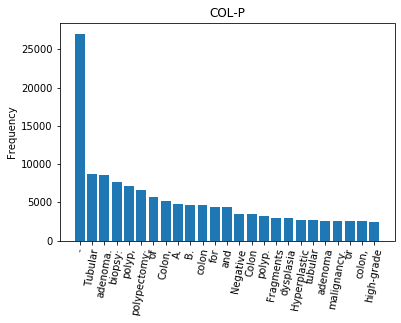



COL-P:KNB1TCC.UXXX7JOGFDWKIQ 

-               2233
adenoma.         870
A.               859
B.               853
Tubular          813
polyp,           740
biopsy:          674
polypectomy:     637
colon            534
of               523
Colon,           452
for              346
Colon            324
and              323
tubular          312
Fragments        300
dysplasia        267
Negative         263
adenoma          247
cm,              245
high-grade       243
Ascending        243
polyp.           233
malignancy.      230
polyp            194
dtype: int64


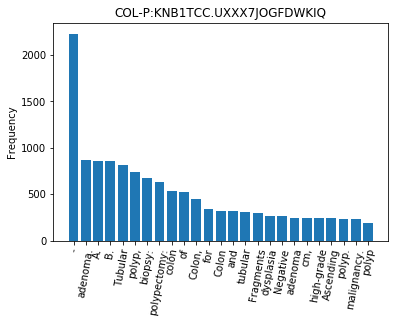



COLBX 

-              13122
for             4969
Negative        4268
biopsy:         4119
Colon,          3050
with            3034
and             2736
or              2517
colonic         2366
mucosa          2214
biopsies:       2066
of              2045
dysplasia       1959
colitis.        1819
malignancy.     1652
A.              1639
B.              1612
active          1425
colon,          1316
dysplasia.      1262
chronic         1235
Benign          1145
diagnostic      1100
colitis,        1036
No              1032
dtype: int64


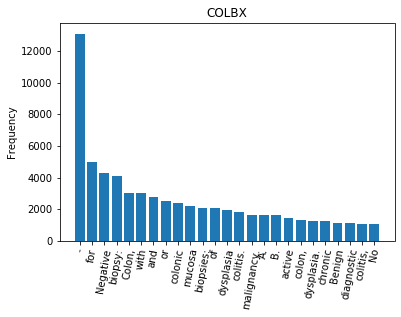



CON-SR 

and                    2254
-                      2061
by                     1237
reviewed               1160
case                   1148
has                    1120
been                   1112
This                   1111
Skin,                  1108
Dermatopathologist.    1077
dictated               1059
biopsy:                1032
with                   1010
the                     860
of                      846
shave                   801
Board-Certified         797
R.                      787
D.O.,                   787
Webb,                   787
Alden                   786
at                      773
performed               686
is                      685
lateral                 566
dtype: int64


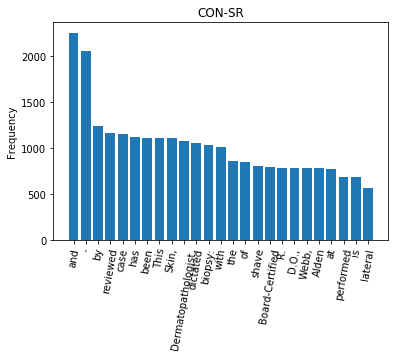



CXBX 

-                  4303
squamous           1607
and                1597
of                 1241
with               1012
biopsy:             990
endocervical        909
dysplasia           887
Cervix,             860
(CIN                828
A.                  825
B.                  825
intraepithelial     806
lesion              700
grade               681
for                 677
See                 558
comment.            462
benign              454
No                  438
identified.         428
Endocervical        427
or                  421
biopsies:           421
curettings:         409
dtype: int64


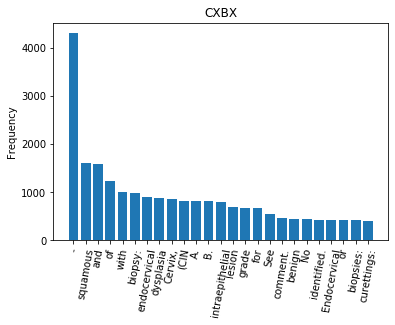



CXBX12 

-                  3483
squamous           1380
biopsy:            1357
Cervix,             821
with                817
of                  802
and                 769
dysplasia           742
A.                  707
B.                  705
(CIN                686
intraepithelial     665
for                 650
endocervical        646
o'clock,            639
12                  611
at                  554
lesion              552
grade               517
Cervix              401
mild                386
See                 359
mucosa              335
Negative            333
Benign              326
dtype: int64


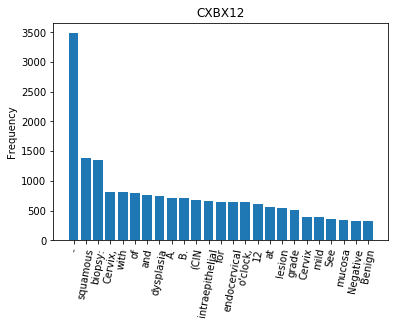



CXBX6 

-                  3322
squamous           1301
biopsy:            1266
dysplasia           817
and                 817
with                798
Cervix,             765
of                  760
B.                  700
A.                  697
(CIN                674
for                 638
o'clock,            629
endocervical        627
6                   579
intraepithelial     563
at                  499
lesion              461
C.                  403
grade               387
Negative            371
1).                 360
Endocervical        346
mucosa              335
benign              330
dtype: int64


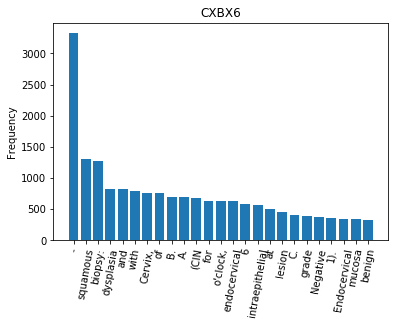



CXCONE 

-                  4962
squamous           1602
endocervical       1243
of                 1235
and                1224
dysplasia          1122
(CIN               1042
with               1002
Cervix,             996
for                 985
intraepithelial     921
LEEP                866
lesion              814
the                 799
dysplasia.          797
grade               681
A.                  669
B.                  668
is                  586
negative            519
to                  498
are                 437
margins             423
at                  420
Negative            419
dtype: int64


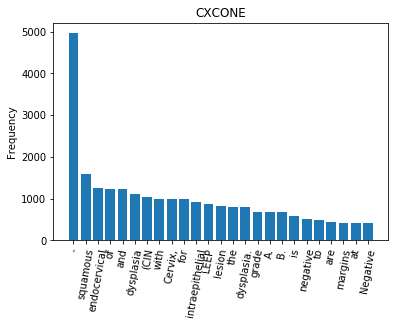



CXPOLYP 

-               2566
endocervical    1094
Cervical         925
Benign           919
polyp,           895
polyp.           700
biopsy:          689
with             663
of               653
and              635
or               596
polyp            507
malignancy.      499
dysplasia        483
for              483
Cervix,          473
polypectomy:     353
No               347
polyp:           340
glandular        336
squamous         333
Negative         325
Endocervical     251
identified.      237
atypia           229
dtype: int64


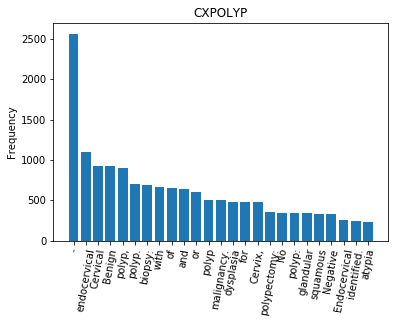



CYST 

-                      1235
and                     437
with                    416
cyst.                   380
excision:               362
Benign                  286
tissue,                 226
Soft                    188
A.                      187
cyst                    184
cyst,                   179
of                      179
by                      178
right                   177
This                    169
left                    167
case                    166
reviewed                166
dictated                165
or                      165
been                    160
has                     159
Dermatopathologist.     153
Board-Certified         153
M.D.,                   146
dtype: int64


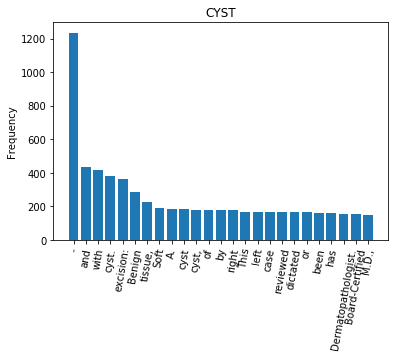



DUOBX 

-                  16127
for                 6830
biopsy:             5943
Negative            5708
with                4559
mucosa              3697
or                  3369
of                  2607
and                 2578
A.                  2396
B.                  2360
Duodenum,           2038
malignancy.         2023
intestinal          1691
chronic             1688
dysplasia           1597
diagnostic          1555
No                  1521
biopsies:           1507
C.                  1503
Benign              1492
abnormality.        1465
duodenal            1462
mucosa.             1164
intraepithelial     1155
dtype: int64


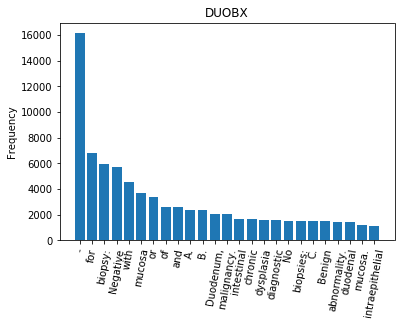



ECC 

-                  10869
squamous            3728
of                  3718
and                 2995
endocervical        2888
with                2526
for                 2315
dysplasia           2220
biopsy:             2023
Endocervical        2007
curettings:         1896
B.                  1712
A.                  1711
Endocervix,         1572
benign              1448
(CIN                1364
intraepithelial     1356
malignancy.         1248
or                  1241
glandular           1205
grade               1175
fragments           1175
Cervix,             1165
curettage:          1156
No                  1143
dtype: int64


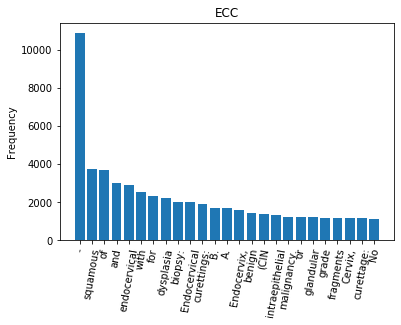



EMBX1 

-                26523
biopsy:          13211
of                9240
or                7838
Endometrial       7194
and               6781
for               6702
endometrial       6390
with              6354
Endometrium,      6167
malignancy.       5683
endometrium       5537
hyperplasia       4903
Negative          4686
proliferative     3898
atypia            3683
hyperplasia,      3453
endometrium.      3272
cytologic         3223
No                3196
Benign            3037
fragments         2789
without           2760
benign            2727
glandular         2347
dtype: int64


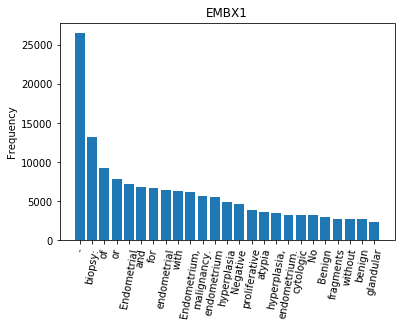



EMC1 

-                4221
of               1679
with             1144
and              1117
or               1105
for              1102
curettings:      1067
Endometrial      1022
endometrial       890
endometrium       843
malignancy.       780
Negative          780
Endometrium,      702
hyperplasia       677
proliferative     673
benign            628
fragments         585
curettage:        530
Benign            525
atypia            497
Fragments         452
endocervical      417
endometrium.      398
polyp.            330
without           325
dtype: int64


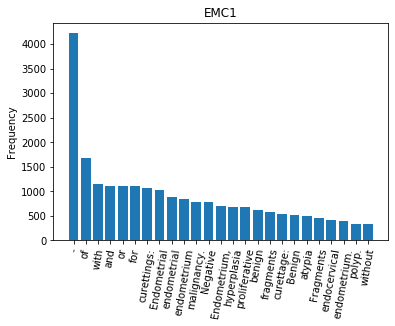



ESBX 

-               9668
for             3921
with            3703
biopsy:         3203
Negative        3168
mucosa          2707
and             2221
or              1756
Esophagus,      1627
dysplasia       1462
esophagus,      1425
intestinal      1343
malignancy.     1286
squamous        1266
of              1264
dysplasia.      1252
Barrett's       1174
chronic         1079
biopsies:       1027
metaplasia       931
A.               923
B.               904
Distal           871
esophagitis.     774
Squamous         761
dtype: int64


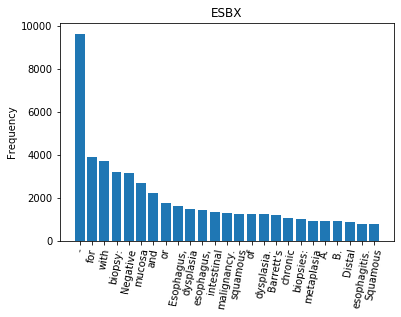



FAL 

-                 903
fallopian         855
tubes,            487
of                466
and               304
Bilateral         301
with              265
Fallopian         249
cross             246
sections          234
bilateral         208
segments          203
Two               201
tubes             198
benign            181
identified.       179
completely        158
tubes:            148
both              142
tube              142
transected.       139
left              139
Complete          138
salpingectomy:    136
no                136
dtype: int64


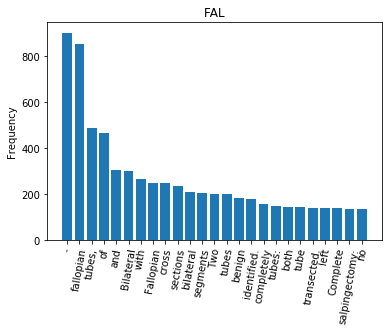



FAL2-ST 

fallopian         1493
-                 1209
Complete           652
of                 635
tube,              613
B.                 568
A.                 468
tube               465
Right              450
cross              442
Left               417
tube.              377
sterilization:     292
sections           268
unremarkable       266
salpingectomy:     264
with               245
transection.       234
and                199
segment,           198
Fallopian          191
section            187
identified.        169
no                 165
tubal              135
dtype: int64


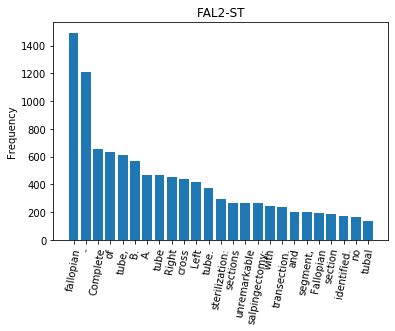



GALLB 

-                   9765
Gallbladder,        4976
cholecystectomy:    4722
Chronic             2982
and                 2881
cholecystitis       2446
cholecystitis.      2343
with                2052
chronic             2046
cholelithiasis.     1442
Cholelithiasis.     1255
Acute                734
Mild                 724
cholesterolosis.     605
for                  602
No                   567
Cholelithiasis       552
Gallbladder:         543
lymph                522
Negative             515
JVR:smh:C2NR         440
DS:mfr               439
of                   435
calculous            372
Cholesterolosis.     367
dtype: int64


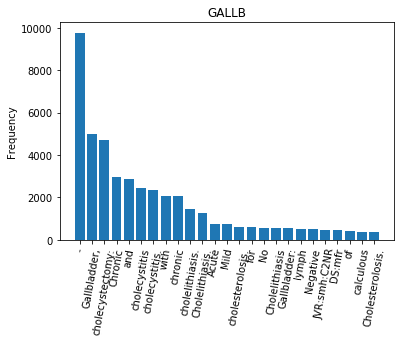



GANGC 

-                      794
cyst.                  358
and                    310
excision:              303
tissue,                295
with                   288
Soft                   286
Benign                 278
ganglion               277
left                   191
right                  185
This                   185
by                     183
reviewed               182
dictated               182
case                   182
has                    181
been                   181
Dermatopathologist.    178
wrist,                 171
Board-Certified        169
M.D.,                  167
A.                     163
PH:clv:C2NR            148
Herreid,               148
dtype: int64


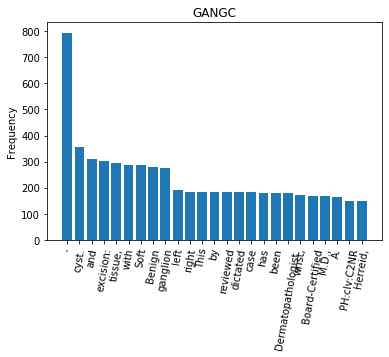



GBX 

-               9130
for             4042
Negative        3345
biopsy:         2937
with            2857
mucosa          2156
Gastric         1883
or              1751
intestinal      1655
and             1559
chronic         1551
Helicobacter    1383
of              1163
A.              1140
B.              1129
gastric         1100
malignancy.      946
pylori           944
dysplasia        930
Benign           894
Stomach,         857
dysplasia.       836
biopsies:        785
metaplasia       772
mild             731
dtype: int64


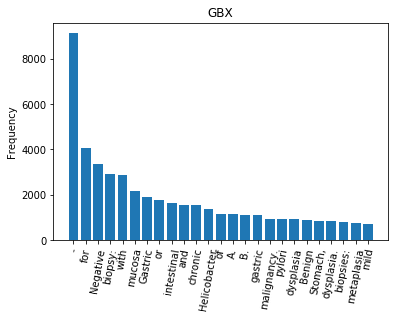



GEJUNC 

-                   3881
for                 1557
with                1446
Negative            1305
mucosa              1203
biopsy:             1199
and                 1030
junction,            885
intestinal           660
GE                   638
chronic              630
Gastroesophageal     608
or                   598
dysplasia.           533
dysplasia            495
metaplasia           471
malignancy.          461
squamous             445
of                   402
A.                   372
Barrett's            363
mild                 359
B.                   352
Benign               314
inflammation.        309
dtype: int64


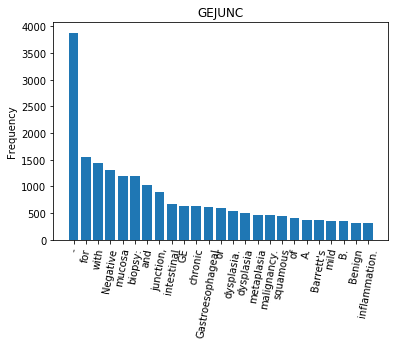



HEMO 

-                    1526
with                  913
and                   597
hemorrhoidectomy:     399
Hemorrhoids,          377
Benign                346
hemorrhoids.          324
or                    305
hemorrhoidal          291
mucosa                273
consistent            248
dysplasia             245
of                    241
Hemorrhoids:          213
dilated               204
tissue,               203
malignancy.           202
No                    183
squamous              183
for                   164
tissue                145
Soft                  139
associated            138
anorectal             136
chronic               135
dtype: int64


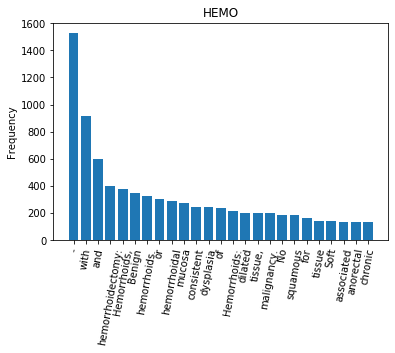



KAD-APPENDIX A 

-                    1613
Appendix,             849
appendectomy:         848
appendicitis          623
Acute                 588
with                  447
neoplasia.            408
for                   329
periappendicitis.     328
of                    310
Negative              307
acute                 270
evidence              240
No                    234
and                   231
appendicitis.         197
AMB:emb:C2NR          157
Marked                148
serositis             141
is                    100
AMB:rrc:C2NR           95
present.               87
periappendicitis       81
Benign                 62
AMB:mdm:C2NR           55
dtype: int64


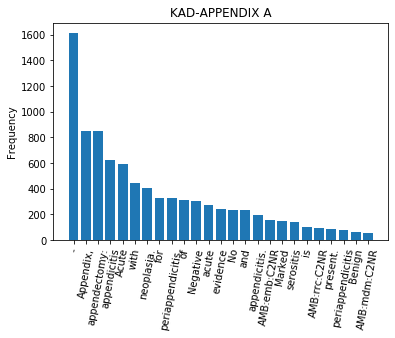



KAD-BRST NBX 

-            4745
of           1774
core         1214
and          1150
biopsies:    1043
breast       1007
needle        960
with          933
for           822
the           746
by            699
score:        587
Left          561
case          545
reviewed      544
was           541
this          541
another       539
part          539
As            539
Quality       539
Assurance     539
GESTALT       539
member        538
Program,      537
dtype: int64


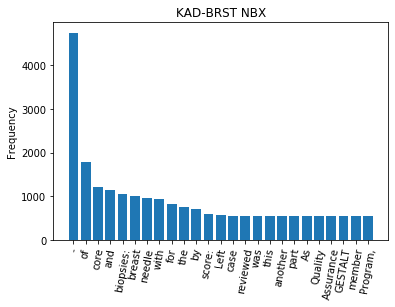



KAD-CECUM BX 

-              1616
of              742
Colon,          464
biopsies:       450
adenoma.        421
or              370
No              353
evidence        336
dysplasia       324
Tubular         307
grade           301
high            301
adenoma         291
tubular         290
malignancy.     271
A.              271
polyp,          255
biopsy:         234
B.              222
colonic         222
Cecal           212
for             201
Multiple        191
Negative        186
Fragments       166
dtype: int64


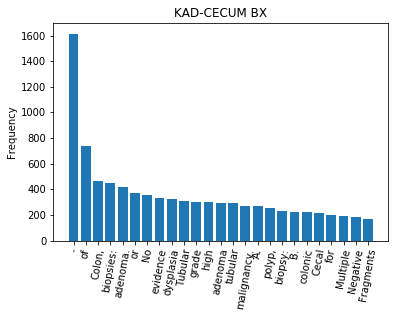



KAD-COL ASC BX 

-              2235
of             1049
biopsies:       649
Colon,          638
or              542
No              538
adenoma.        515
evidence        461
dysplasia       438
grade           426
high            425
Tubular         416
adenoma         415
tubular         408
Ascending       392
A.              365
malignancy.     352
colonic         330
B.              304
biopsy:         303
polyp,          287
for             284
colon,          283
Multiple        274
ascending:      271
dtype: int64


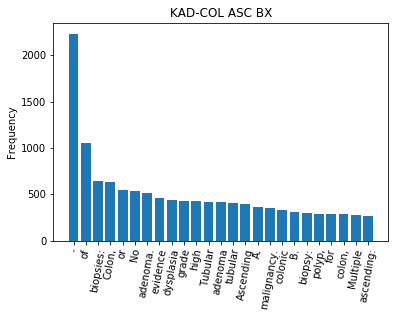



KAD-COL BX 

-              1284
of              581
Colon,          400
biopsies:       364
Colon           307
adenoma.        305
or              303
Tubular         292
cm,             286
No              278
at              277
polyp           272
evidence        269
dysplasia       266
adenoma         252
tubular         249
grade           248
high            247
malignancy.     190
biopsy:         184
colonic         182
Multiple        157
for             145
cm:             140
Negative        126
dtype: int64


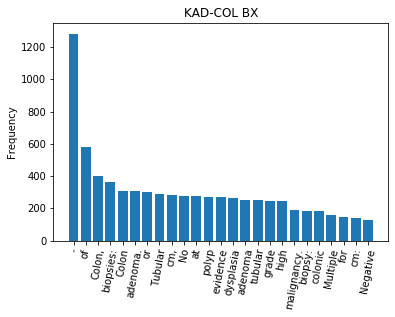



KAD-DUO BX 

-               2764
biopsies:       1174
for             1024
Negative         907
Duodenum,        843
A.               761
or               742
with             664
biopsy:          532
No               495
active           439
villous          366
acute            358
B.               352
significant      350
blunting.        346
Unremarkable     344
mucosa           343
inflammation     314
Benign           281
mucosa.          268
dysplasia.       267
vascular         267
pathologic       260
abnormality      258
dtype: int64


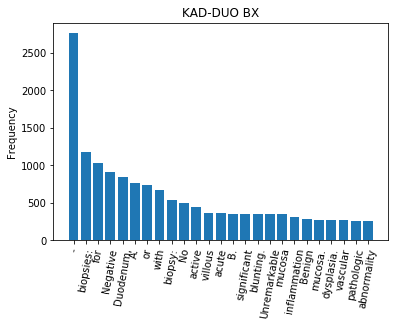



KAD-EM BX 

-                2249
biopsy:           872
Endometrium,      842
endometrium       740
or                722
of                667
for               596
with              585
Negative          530
without           494
and               493
atypia            469
polyp             459
malignancy.       434
proliferative     416
hyperplasia       378
Endometrium:      348
endometrial       346
phase             327
Benign            321
benign            296
stromal           294
atypia,           290
Proliferative     282
polyp,            264
dtype: int64


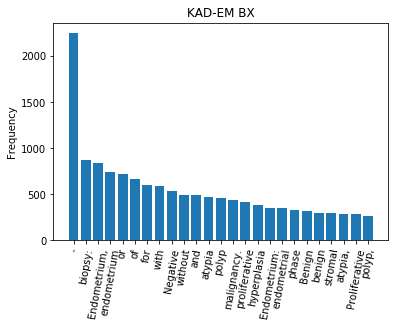



KAD-EMC 

-                1259
of                437
Endometrium,      408
with              402
and               390
endometrium       351
for               329
or                316
Negative          297
curettage:        266
without           256
atypia            252
endometrial       234
malignancy.       226
polyp             205
proliferative     204
stromal           202
benign            194
curettings:       181
hyperplasia       178
phase             149
Benign            149
Fragments         135
Endometrium:      129
fragments         129
dtype: int64


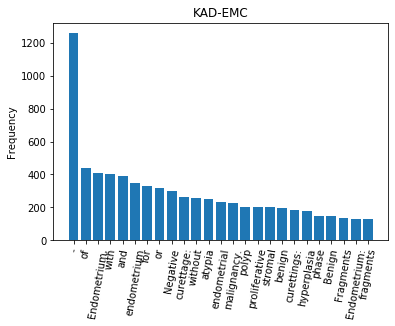



KAD-GASTRIC BX 

-                3029
biopsies:        1256
for              1054
Negative          974
with              862
Stomach,          777
mucosa            631
A.                550
vascular          452
Benign            423
Gastric           419
congestion.       407
No                382
gastric           371
inflammation.     354
biopsy:           324
dysplasia         322
acute             320
and               319
or                303
B.                287
Mild              261
gastritis         244
of                230
pylori            228
dtype: int64


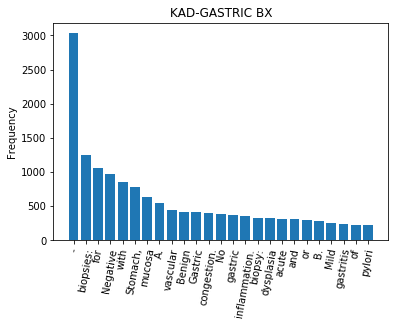



KAD-GB 

-                     3754
Gallbladder,          1575
cholecystectomy:      1573
Chronic               1270
cholecystitis         1141
of                     890
evidence               767
with                   764
No                     756
neoplasia              508
and                    454
Cholelithiasis         421
cholelithiasis.        398
cholecystitis.         388
AMB:emb:C2NR           298
neoplasia.             287
chronic                258
present                239
Cholelithiasis.        235
Rokitansky-Aschoff     227
sinuses                225
lymph                  224
cholelithiasis         195
cholesterolosis.       186
AMB:rrc:C2NR           152
dtype: int64


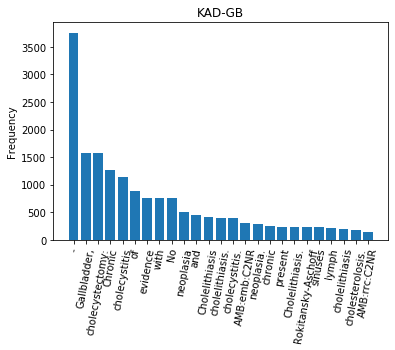



KAD-PLAC 3T 

-               10825
with             3916
of               3652
for              2815
gestational      2748
umbilical        2699
cord             2690
No               2367
pathologic       2234
age.             2208
evidence         1879
no               1846
and              1520
maturation       1420
abnormality.     1394
membranes        1357
Fetal            1346
fetal            1338
villi            1331
Chorionic        1328
percentile       1322
grams),          1321
Placenta         1307
Placental        1304
vessel           1275
dtype: int64


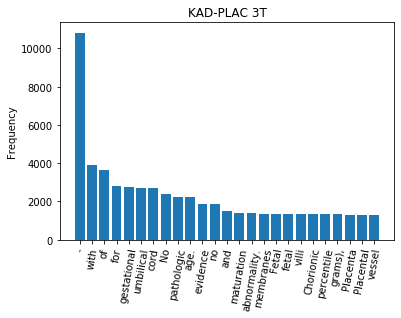



KAD-PLAC 3T GRS 

AND            4694
AS             4694
CORD           4694
PLACENTA       4693
TRIVASCULAR    4693
GROSSLY        4692
TERM           4691
DESCRIBED.     4683
GRAMS)         3734
A.             2673
UMBILICAL      1836
g)              514
-               235
fallopian       217
B.              137
tube,           134
of              125
pathologic      104
Fallopian       101
cross            91
identified.      79
sections         77
No               76
C.               74
tube             67
dtype: int64


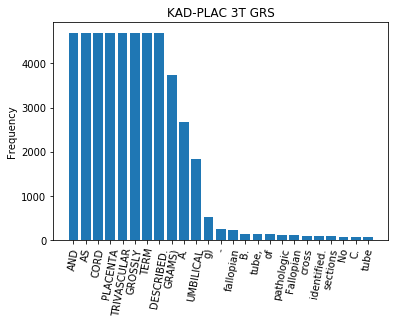



KAD-RECTAL BX 

-               884
Rectal          277
of              264
biopsy:         193
biopsies:       177
Rectum,         175
polyp,          165
for             164
polyp.          161
Hyperplastic    160
adenoma         149
Negative        147
and             145
Tubular         135
or              121
with            118
adenoma.        115
dysplasia       115
malignancy.     115
No              104
evidence         94
mucosa           86
grade            81
hyperplastic     80
AMB:emb:C2NR     78
dtype: int64


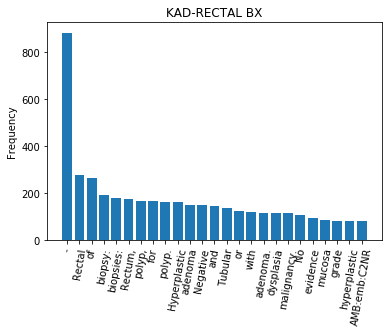



KAD-SK BX <1CM 

-                      4371
Skin,                  2584
and                    1971
biopsy:                1761
left                   1266
right                  1243
with                   1229
shave                  1208
of                     1101
at                     1079
present                1026
biopsy                  918
the                     914
cell                    835
by                      813
This                    805
case                    774
reviewed                773
dictated                769
Dermatopathologist.     747
to                      734
Board-Certified         707
M.D.,                   613
carcinoma               610
edges.                  596
dtype: int64


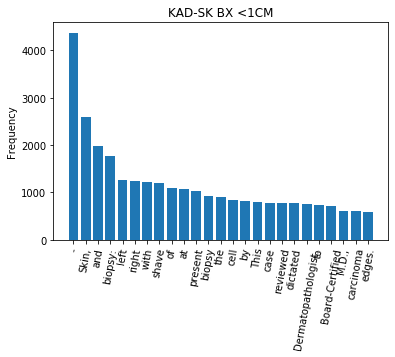



KAD-SK BX1 

-                      2298
Skin,                  1087
and                     789
with                    641
cell                    626
excision:               618
left                    587
right                   501
by                      463
at                      445
case                    436
reviewed                436
This                    434
dictated                431
Dermatopathologist.     420
Board-Certified         395
M.D.,                   389
of                      388
carcinoma               380
Rozelle,                361
L.                      361
Christopher             360
present                 343
biopsy:                 343
residual                334
dtype: int64


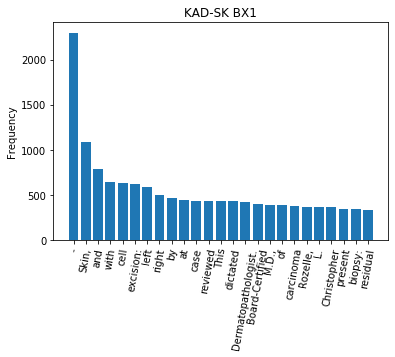



KAD-SOFT NOS 

-               1210
with             671
tissue           525
and              478
excision:        467
mass,            312
consistent       216
of               215
for              194
inflammation     184
Benign           183
Negative         177
right            176
Soft             172
left             160
Right            155
AMB:emb:C2NR     152
without          145
Left             136
features         136
adipose          136
atypical         127
foreign          101
lipoma.           97
body              95
dtype: int64


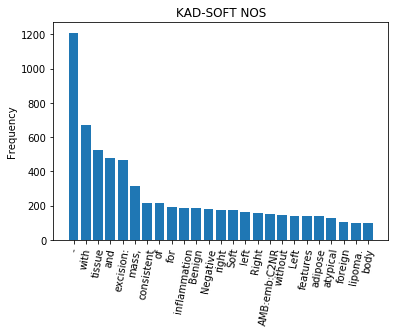



KAD-STONE RENAL 

FURTHER        682
WILL           682
OUTSIDE        682
BE             682
TO             682
THE            682
FOR            682
FACILITY       682
CHEMICAL       682
IDENTIFIED.    681
AN             681
CALCULI        681
SENT           681
SPECIMEN       681
ANALYSIS.      679
for             51
an              49
outside         49
chemical        49
to              49
be              49
specimen        49
will            49
further         49
analysis.       49
dtype: int64


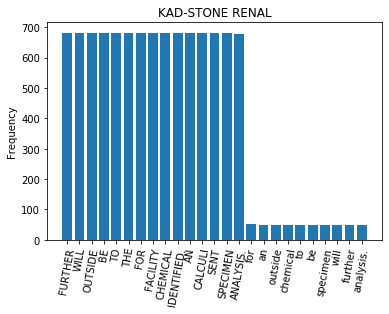



KAD-UT OV 

-                 3841
and               1612
fallopian         1080
with              1038
bilateral          832
Benign             521
Uterus             517
grams)             441
tubes              420
hysterectomy       419
salpingectomy:     408
cysts.             400
atypia             396
tubes,             396
pathologic         365
without            324
endometrium        312
no                 305
for                273
Myometrium         269
abnormality        259
benign             240
Proliferative      232
cm                 208
glandular          205
dtype: int64


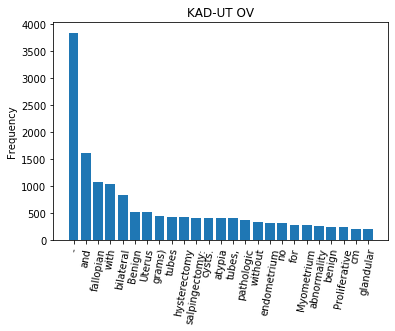



KIDST 

-            948
Stone        586
Calculi      513
analysis     458
pending.     323
material     312
present.     304
kidney       282
to           275
stone:       249
be           181
addendum.    180
as           155
Left         154
Calcium      144
an           142
for          133
Right        126
Submitted    125
oxalate      124
results      122
analysis,    122
Gross        121
issued       121
x            118
dtype: int64


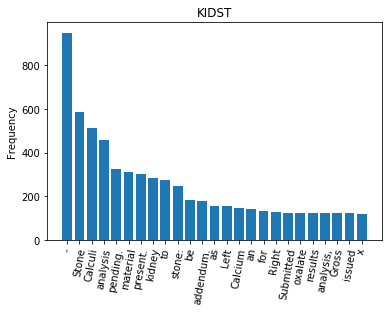



LABIA 

-              1111
biopsy:         526
with            309
and             293
Skin,           220
labia,          220
labia           215
for             195
dysplasia       177
or              163
Negative        139
Benign          138
Right           133
squamous        133
Left            131
A.              124
malignancy.     121
chronic         119
left            118
right           116
See             114
of              110
by              102
This             99
case             99
dtype: int64


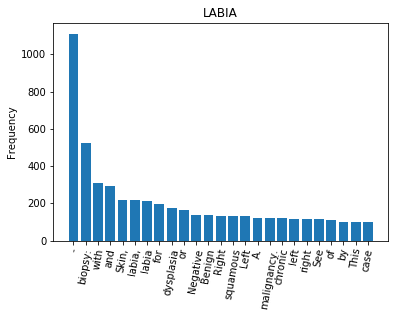



LIP-BX 

is             1396
the            1364
this           1357
of             1141
and            1103
to             1032
report         1022
-              1000
ICD-10          745
not             700
for             698
provided        678
internal        678
information     678
lip:            631
lower           422
or              395
been            377
a               347
The             342
was             341
within          340
as              340
may             340
be              340
dtype: int64


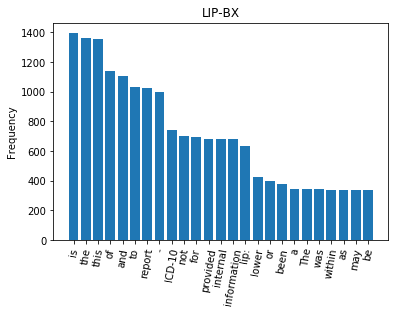



LIPOMA 

-                      1577
tissue,                 968
excision:               747
Soft                    718
with                    708
lipoma.                 623
consistent              570
Benign                  428
tissue                  419
and                     404
adipose                 384
right                   341
Lipoma.                 341
left                    337
A.                      286
by                      244
This                    243
reviewed                241
case                    241
dictated                239
Mature                  220
been                    219
has                     218
Dermatopathologist.     210
Board-Certified         197
dtype: int64


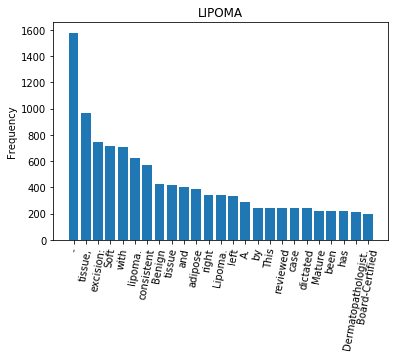



LIV-NBX 

-                1443
with              680
biopsy:           578
of                560
and               525
Liver,            504
fibrosis          467
needle            459
hepatitis         368
activity          364
4                 320
(grade            253
score             248
(stage            244
Metavir           243
Chronic           243
mild              237
for               223
core              221
portal            214
Batts-Ludwig;     185
Negative          183
grades,           170
stages,           160
scoring           158
dtype: int64


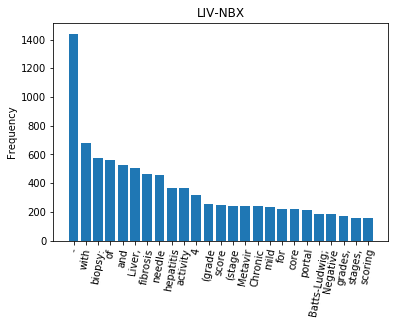



LYM-BX 

-             3257
lymph         1088
with           546
node,          514
of             508
and            490
for            472
node           464
Lymph          447
biopsy:        358
nodes          335
Tumor          331
benign         267
the            260
carcinoma      224
Left           213
Negative       212
left           210
negative       209
Right          206
See            200
excision:      194
metastatic     188
Benign         184
right          184
dtype: int64


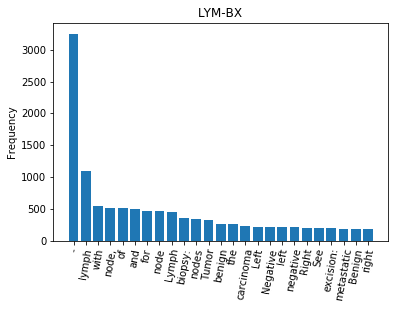



NAIL-PAF 

-                      1426
by                      860
and                     621
PAS                     534
Nail                    451
fungal                  444
case                    424
dictated                424
reviewed                424
This                    424
has                     423
M.D.,                   422
Dermatopathologist.     422
been                    422
ancillary               411
staining.               395
nail                    363
with                    362
Board-Certified         355
A.                      333
toe:                    330
identified              329
Peter                   323
Herreid,                323
PH:clv:C2NR             320
dtype: int64


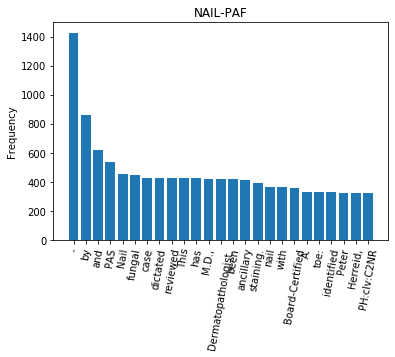



OE-COL-P 

-               5118
colon           2692
polyp,          2354
polypectomy:    2209
Tubular         2013
endoscopic      1181
and             1159
adenoma.        1159
polyps,         1119
Hyperplastic     992
of               923
polyp.           903
biopsies:        903
Transverse       717
Ascending        670
A.               643
B.               636
biopsy:          622
with             621
sigmoid          590
adenoma          587
hyperplastic     569
LT:clv:C2NR      561
colon,           553
mucosa           550
dtype: int64


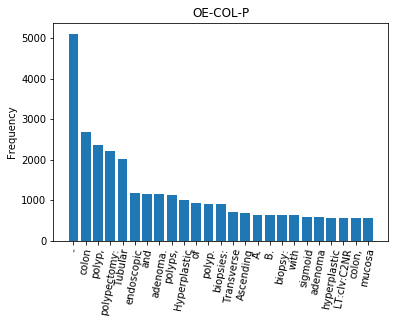



OE-DUOBX 

-               3406
with            1287
mucosa          1127
biopsy:         1018
for              726
No               710
Negative         689
and              645
biopsies:        570
no               561
diagnostic       559
B.               532
A.               531
chronic          498
or               498
of               490
endoscopic       461
Duodenum,        413
Gastric          411
Duodenal         398
pylori           393
C.               371
dysplasia        332
mild             329
abnormality.     323
dtype: int64


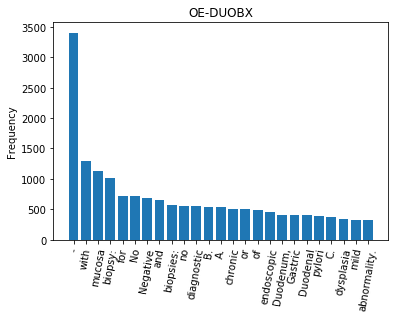



OE-STOMBX 

-               4969
for             1535
with            1525
Negative        1464
and             1256
mucosa          1229
biopsy:         1133
Gastric          974
pylori           962
No               935
chronic          891
or               717
by               693
A.               684
B.               683
biopsies:        671
endoscopic       614
dysplasia        588
mild             584
dysplasia.       574
antrum,          571
Stomach,         571
Helicobacter     557
of               546
reactive         476
dtype: int64


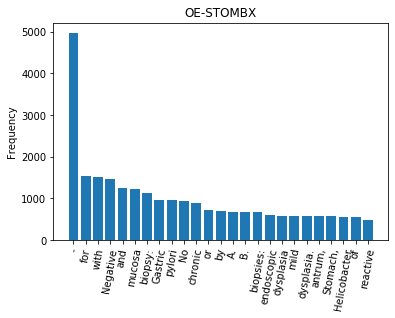



ORAL 

is             6289
the            6083
this           6033
of             5644
to             4659
report         4526
and            4269
-              4247
ICD-10         3236
for            3159
not            3102
internal       3012
information    3012
provided       3012
or             1667
been           1548
a              1530
was            1516
on             1514
be             1513
as             1511
The            1511
within         1510
which          1508
including      1507
dtype: int64


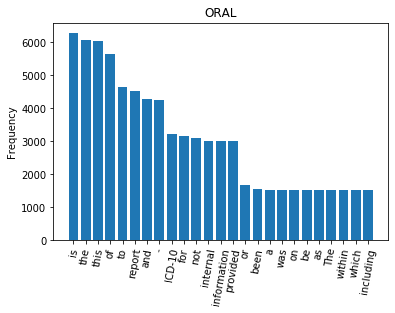



ORALS 

is             4103
the            3987
this           3950
of             3762
to             3047
report         2964
-              2884
and            2813
ICD-10         2140
for            2032
not            2009
internal       1976
information    1976
provided       1976
or             1035
with           1016
been            995
be              993
a               993
within          991
was             990
on              990
which           989
The             989
appropriate     988
dtype: int64


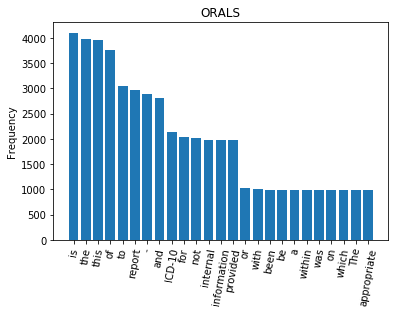



PAR-BLK 

performed      869
No             868
diagnosis;     861
technical      861
only           860
-              177
by              70
of              68
for             63
the             54
with            49
is              49
to              44
nuclear         43
and             42
expression.     40
Intact          39
See             38
HER-2           38
in              33
Negative        27
gene            25
testing         24
cell            21
are             21
dtype: int64


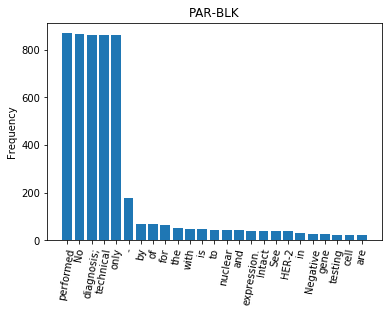



PLAC 

-                  7163
with               2802
and                2157
umbilical          1990
placenta           1777
of                 1744
cord               1419
acute              1302
for                1248
Mild               1002
the                1001
inflammatory        991
chorionic           948
villous             919
are                 753
trivascular         740
The                 716
showing:            713
villi               686
INTERPRETATION:     682
placental           678
is                  673
Term                633
maturation.         629
mild                625
dtype: int64


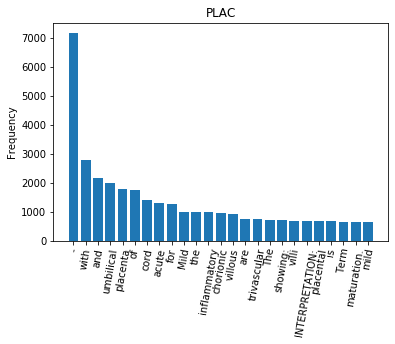



POC-S 

-              2256
of             1953
and            1045
with            906
Products        889
chorionic       677
Uterine         605
villi           579
contents:       562
identified.     495
products        493
conception.     416
consistent      416
conception:     414
tissue          340
conception      325
decidua         322
No              314
Immature        243
fetal           234
are             232
conception,     225
villi,          214
endometrium     192
immature        188
dtype: int64


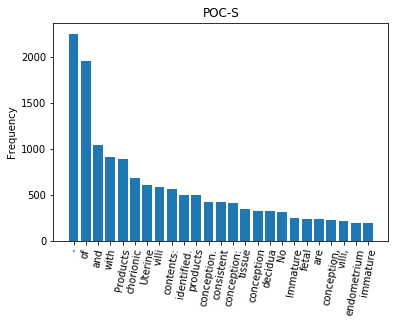



PROS6-BX 

-                15116
of                4409
prostatic         3939
Tumor             3860
Benign            3449
tissue.           3332
Left              2948
Right             2946
base:             1961
apex:             1960
mid:              1958
Gleason           1492
Perineural        1426
quantitation:     1398
Prostatic         1390
invasion:         1369
core              1302
with              1254
confluent         1251
Longest           1239
involves          1189
needle            1185
identified.       1148
+                 1137
and               1110
dtype: int64


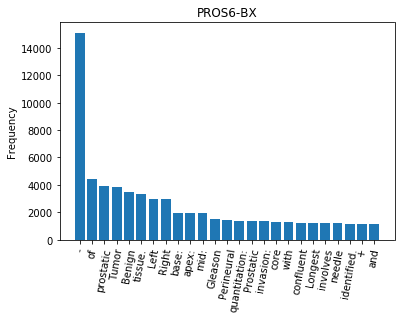



PROS6-BX:DUDBCZSPMKMZTYWDG-QBAQ 

-                24693
of                7815
Tumor             6619
prostatic         6355
Benign            4676
tissue.           4505
Left              4219
Right             4200
apex:             2818
mid:              2803
base:             2797
Prostatic         2429
Gleason           2295
two               2281
invasion:         2253
quantitation:     2230
Perineural        2170
involves          2164
confluent         2134
Grade             2132
Longest           2110
in                2098
mm.               1957
length            1866
and               1857
dtype: int64


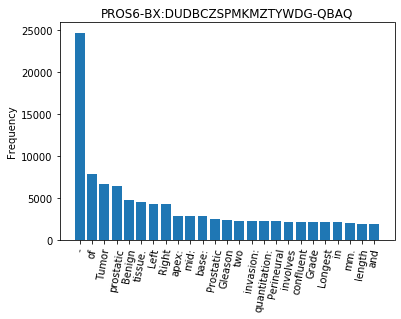



REC 

-               1412
biopsy:          502
with             425
for              414
Negative         371
and              368
Rectum,          341
of               274
mucosa           272
or               215
dysplasia        184
Rectal           165
chronic          159
biopsies:        157
malignancy.      145
Colon,           138
colonic          120
hyperplastic     114
dysplasia.       110
active           107
Benign           107
Fragments         96
polyp.            96
No                92
Hyperplastic      88
dtype: int64


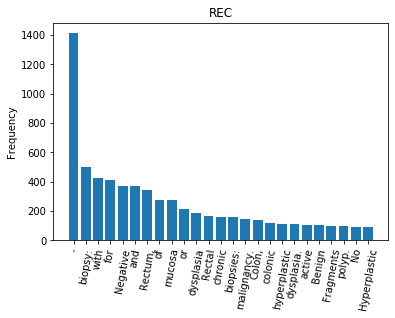



RECT-P 

-               4332
Rectal          1514
polyp,          1412
polyp.          1396
polypectomy:    1237
Hyperplastic    1178
biopsy:         1165
of               912
adenoma.         860
hyperplastic     802
and              766
Tubular          681
for              572
Fragments        551
Rectum,          551
Colon,           516
Negative         463
by               449
This             440
case             438
reviewed         437
dictated         436
was              419
with             412
M.D.             409
dtype: int64


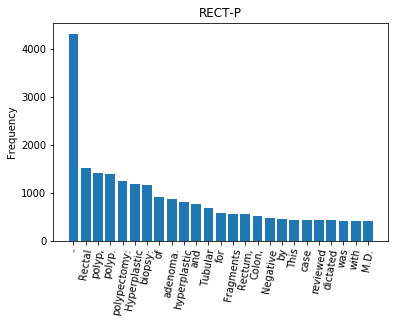



SBRSTNBX 

-               4887
with            1747
and             1235
breast           961
of               909
core             871
breast,          716
in               695
needle           648
biopsy:          626
for              604
stereotactic     569
Benign           568
or               559
ductal           522
Left             492
Right            487
o'clock,         474
Negative         463
atypia           453
tissue           445
focal            416
tumor            407
identified.      398
carcinoma        387
dtype: int64


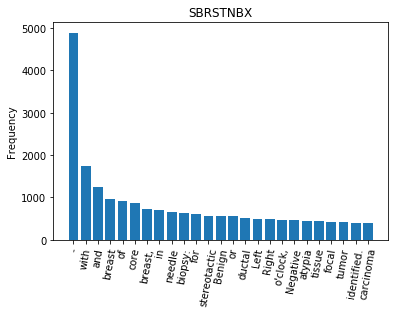



SE-COL-P 

-                 4297
Colon             2104
of                1656
Fragments         1319
adenoma.          1316
and               1211
polyp,            1101
polypectomy:      1094
polyps,           1054
polypectomies:    1045
tubular            940
Tubular            872
colon              606
transverse,        602
ascending,         583
adenomas.          556
A.                 542
B.                 540
colonic            500
polyp.             491
hyperplastic       481
sigmoid,           428
mucosa.            414
serrated           407
STL:smn:C2NR       398
dtype: int64


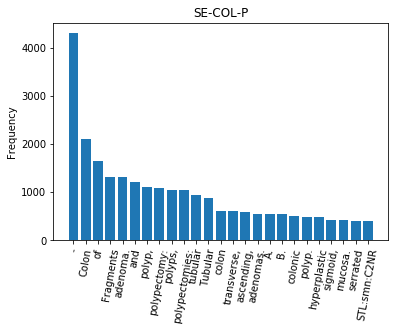



SIG-P 

-               5453
polyp,          1695
Sigmoid         1668
polypectomy:    1491
biopsy:         1490
adenoma.        1357
polyp.          1332
Tubular         1255
sigmoid,        1195
of              1110
Hyperplastic    1060
colon            986
Colon,           919
and              846
hyperplastic     832
for              773
Colon            729
A.               667
B.               643
Negative         608
Fragments        586
with             566
dysplasia        520
colon,           518
polyp            474
dtype: int64


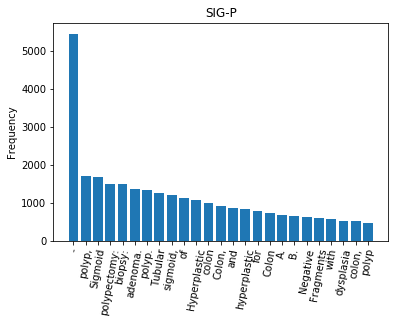



SINUS 

-              2797
and            1287
with           1088
of             1070
sinus           764
chronic         720
respiratory     675
mucosa          656
contents:       613
sinusitis.      504
Left            501
fragments       489
Right           474
benign          470
bone.           460
A.              438
B.              422
Benign          409
Chronic         398
for             342
Fragments       326
bone            325
or              299
Negative        290
malignancy.     282
dtype: int64


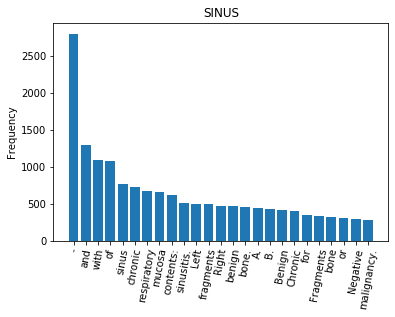



SK-AD 

-                      1815
Skin,                  1255
biopsy:                1197
and                    1134
shave                   947
by                      765
reviewed                730
case                    730
Dermatopathologist.     730
been                    730
This                    730
has                     730
dictated                729
at                      651
right                   589
left                    547
lateral                 534
Alden                   468
R.                      468
Board-Certified         468
Webb,                   468
D.O.,                   468
present                 449
with                    447
margin.                 316
dtype: int64


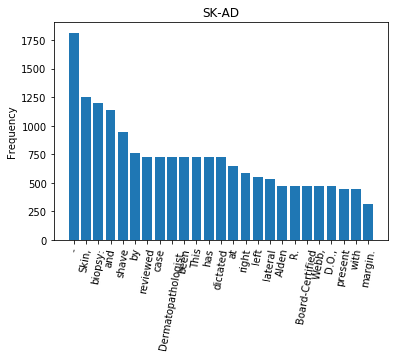



SK-DS 

-                      1846
Skin,                  1355
biopsy:                1246
and                     750
punch                   715
(see                    712
Comment).               692
left                    652
right                   608
shave                   525
by                      514
with                    504
case                    480
reviewed                480
This                    478
been                    478
Dermatopathologist.     478
has                     478
dictated                477
lateral                 422
at                      368
dermatitis              319
Board-Certified         297
Alden                   292
D.O.,                   292
dtype: int64


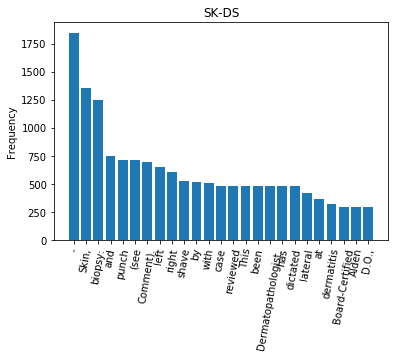



SK-EWD 

-                      1735
and                    1587
Skin,                  1463
biopsy:                1454
shave                  1279
at                     1143
biopsy                 1128
present                1035
edges.                  921
by                      774
dictated                749
reviewed                749
This                    749
has                     749
been                    749
Dermatopathologist.     747
case                    747
Board-Certified         727
M.D.,                   702
Christopher             682
Rozelle,                682
L.                      681
with                    679
left                    676
cell                    651
dtype: int64


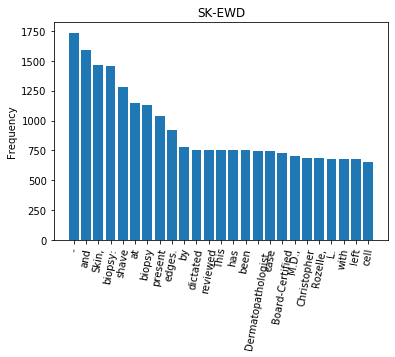



SK-NWD 

-                      7182
and                    6572
Skin,                  6545
biopsy:                6477
shave                  5869
by                     4573
case                   4543
reviewed               4542
has                    4541
This                   4541
been                   4539
Dermatopathologist.    4538
dictated               4533
at                     3644
Board-Certified        3382
Alden                  3377
R.                     3377
D.O.,                  3377
Webb,                  3374
present                3014
left                   3011
right                  2843
lateral                2605
cell                   2004
deep                   1915
dtype: int64


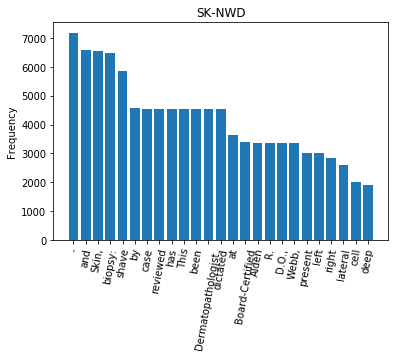



SK-VD 

-                      5010
and                    4610
Skin,                  4430
biopsy:                4427
shave                  3730
by                     3124
case                   3091
This                   3090
been                   3089
has                    3089
reviewed               3088
Dermatopathologist.    3084
dictated               3080
at                     2303
Board-Certified        2145
R.                     2133
Alden                  2132
Webb,                  2132
D.O.,                  2131
lateral                2115
present                2007
left                   1947
right                  1931
deep                   1327
margins.               1221
dtype: int64


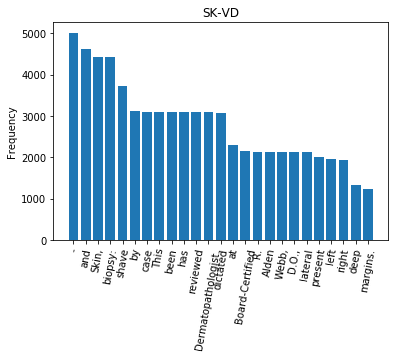



SKC1 

-                      3713
and                    2107
Skin,                  2065
by                     1460
This                   1458
reviewed               1455
case                   1454
dictated               1451
has                    1422
been                   1422
Dermatopathologist.    1410
excision:              1295
Board-Certified        1232
cyst.                  1105
biopsy:                1021
M.D.,                  1020
left                   1000
right                   980
with                    938
A.                      725
inclusion               678
Benign                  608
Herreid,                524
Peter                   521
of                      520
dtype: int64


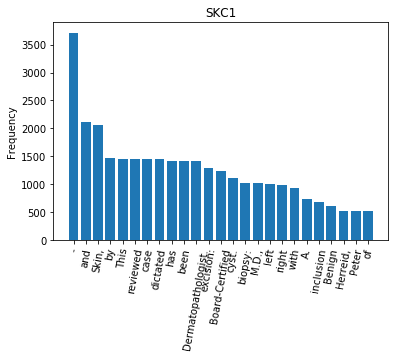



SKD1 

-                      1184
Skin,                   998
biopsy:                 962
and                     764
shave                   689
at                      487
by                      479
has                     466
been                    466
Dermatopathologist.     466
dictated                466
reviewed                466
This                    466
case                    466
left                    450
Board-Certified         420
right                   420
biopsy                  388
with                    364
M.D.,                   293
cell                    290
present                 289
L.                      249
Rozelle,                249
Christopher             245
dtype: int64


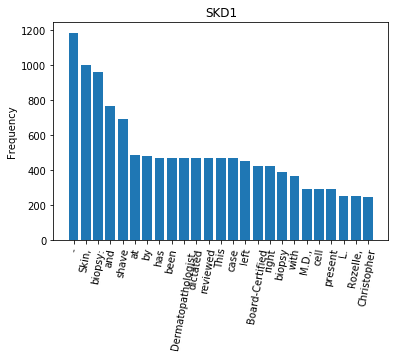



SKO1 

-                      72548
Skin,                  47821
biopsy:                38211
and                    34866
by                     24143
This                   23745
case                   23625
reviewed               23622
dictated               23496
been                   23204
has                    23192
Dermatopathologist.    22968
shave                  22933
left                   21371
right                  20495
Board-Certified        19949
M.D.,                  15967
at                     14497
with                   14474
the                    13723
cell                   13401
A.                     13024
present                12814
of                     12425
punch                   9490
dtype: int64


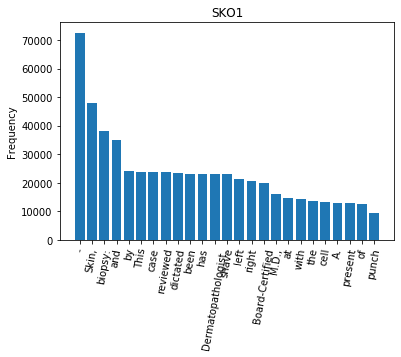



SKO1:U3COANHU2-BTXRC9W.DX3G 

-                      2659
Skin,                  2013
biopsy:                1656
shave                  1320
and                     929
left                    911
right                   897
at                      880
A.                      818
the                     786
present                 783
cell                    712
C.                      708
B.                      705
of                      513
lateral                 491
with                    478
by                      453
This                    440
reviewed                439
dictated                438
case                    438
been                    437
has                     436
Dermatopathologist.     432
dtype: int64


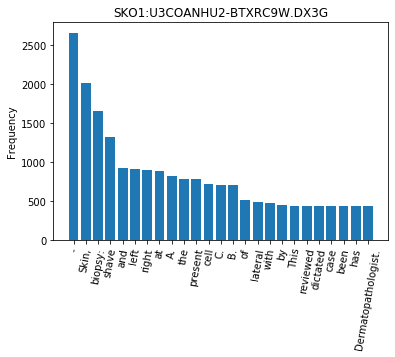



SKO1:YQ7GCLSI5MRLZOQC7UV3DA 

-                      7243
Skin,                  5323
biopsy:                4440
A.                     3291
shave                  3092
and                    2992
B.                     2841
left                   2419
right                  2297
at                     2071
present                1847
by                     1727
This                   1689
case                   1680
reviewed               1679
dictated               1671
been                   1657
has                    1656
cell                   1648
Dermatopathologist.    1642
the                    1633
Board-Certified        1444
with                   1366
of                     1257
lateral                1151
dtype: int64


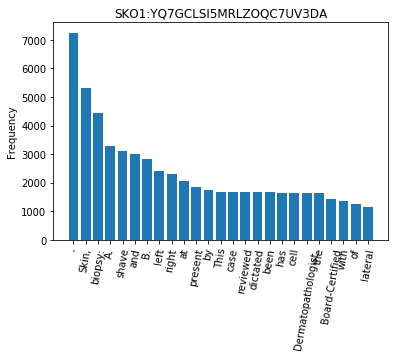



SKO2 

-                      7585
Skin,                  3718
excision:              2719
and                    2248
cell                   2228
left                   1762
by                     1622
right                  1585
with                   1570
This                   1506
case                   1496
reviewed               1494
dictated               1491
has                    1465
been                   1465
Dermatopathologist.    1449
at                     1302
residual               1301
M.D.,                  1190
Board-Certified        1055
of                     1022
for                     980
basal                   979
margins                 965
carcinoma,              921
dtype: int64


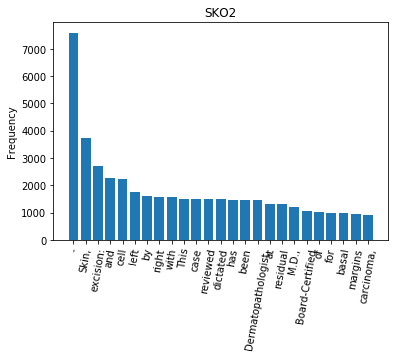



SKO3 

-                      1570
Skin,                   709
and                     482
cell                    450
excision:               446
by                      356
left                    334
This                    327
case                    327
reviewed                326
dictated                325
has                     322
been                    322
Dermatopathologist.     320
right                   319
M.D.,                   298
with                    281
Board-Certified         274
residual                264
of                      227
not                     216
carcinoma,              214
margins                 212
at                      206
A.                      195
dtype: int64


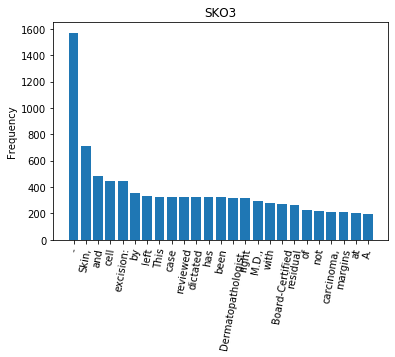



SKO4 

-                      1789
Skin,                   603
and                     480
excision:               329
by                      313
cell                    311
of                      310
right                   283
left                    281
with                    255
This                    254
reviewed                252
residual                250
case                    250
dictated                250
been                    248
identified.             248
has                     248
Dermatopathologist.     247
M.D.,                   237
Board-Certified         233
melanoma                223
in                      215
the                     203
excision                203
dtype: int64


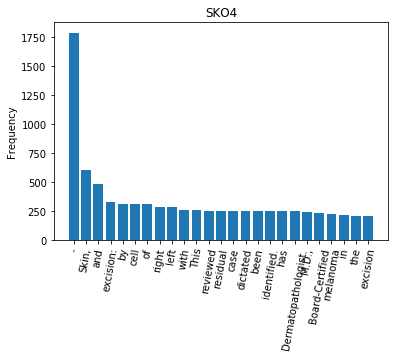



SMB-BX 

-               4239
for             1839
Negative        1643
biopsy:         1369
with            1071
or              1058
and              894
mucosa           842
malignancy.      731
dysplasia        678
A.               616
B.               609
biopsies:        546
of               505
chronic          498
Terminal         484
bowel            480
diagnostic       474
active           471
No               438
Colon,           438
ileum,           436
abnormality.     394
C.               375
colonic          353
dtype: int64


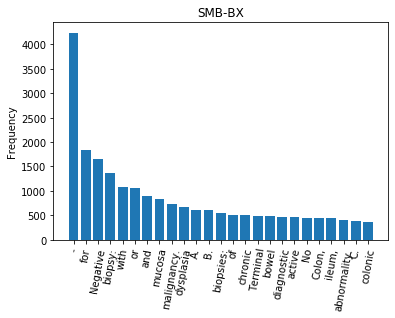



SOFT 

-              3847
with           1646
excision:      1296
and            1272
tissue,         883
Benign          755
of              729
Soft            694
tissue          645
right           559
Right           510
biopsy:         505
Left            493
left            492
consistent      474
for             445
mass,           437
by              362
Negative        358
cyst.           338
This            333
reviewed        330
case            329
malignancy.     329
dictated        327
dtype: int64


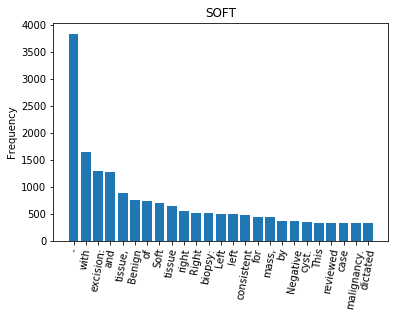



SOFT-O 

-                      3555
and                    1151
with                    919
tissue,                 810
Soft                    713
of                      622
A.                      548
right                   526
Benign                  500
left                    484
by                      472
This                    449
reviewed                443
case                    442
dictated                439
has                     431
excision:               430
been                    429
Dermatopathologist.     418
Board-Certified         416
M.D.,                   414
tissue                  380
biopsy:                 329
Herreid,                326
or                      325
dtype: int64


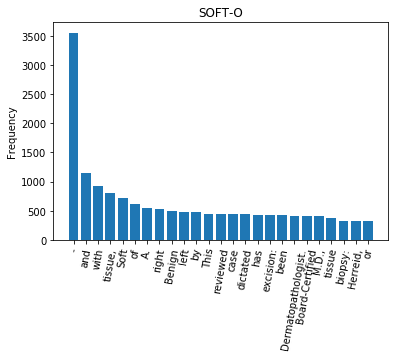



STOMBX 

-               3782
for             1609
Negative        1460
and             1185
with            1011
biopsy:          982
intestinal       827
mucosa           804
Stomach,         800
gastric          660
metaplasia       637
chronic          565
biopsies:        543
H.               543
pylori           500
A.               472
mucosa.          472
B.               459
or               443
dysplasia.       405
of               370
Helicobacter     343
reactive         334
Gastric          309
random,          298
dtype: int64


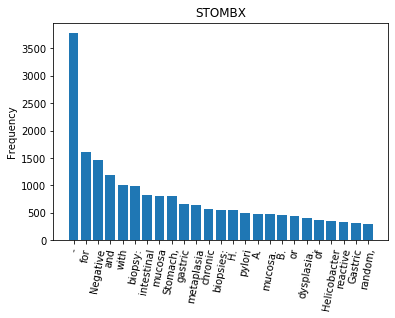



TONG-BX 

-              1833
of             1308
and            1007
is             1006
the             950
this            884
tongue:         760
to              744
with            700
report          660
for             598
not             505
ICD-10          481
internal        440
provided        440
information     440
lateral         421
Right           411
Left            396
or              386
squamous        251
been            249
be              230
within          226
on              226
dtype: int64


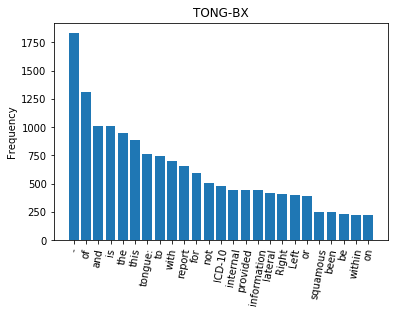



TONS1 

-                 1217
and                669
tonsillectomy:     565
hyperplasia.       542
with               522
lymphoid           490
Benign             482
tonsils,           322
Bilateral          303
follicular         281
bilateral          278
hyperplasia        260
Tonsils,           248
right              231
Left               217
reactive           183
Follicular         172
DS:mfr             169
Actinomyces        160
tonsillar          155
tissue             144
acute              140
tonsils            135
for                132
Right              131
dtype: int64


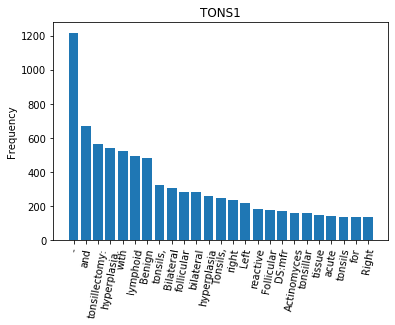



TONSB 

-                 1532
and                886
hyperplasia.       726
tonsillectomy:     701
Benign             650
bilateral          568
with               488
tonsils,           478
lymphoid           469
right              371
Left               327
Tonsils,           262
hyperplasia        230
Actinomyces        220
tissue             194
present.           180
chronic            175
or                 173
Bilateral          169
tonsillar          168
left               154
Right              149
reactive           149
tonsils:           146
tonsils            143
dtype: int64


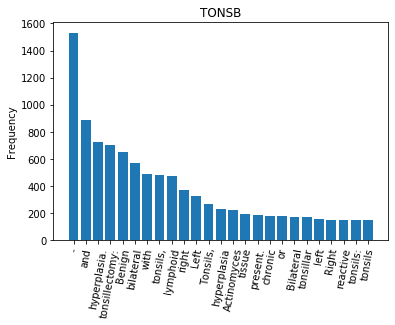



URINBL-BX 

-              3559
biopsy:        1116
with            805
of              748
urothelial      731
Bladder,        633
and             604
No              489
or              483
for             478
identified.     464
chronic         421
Bladder         379
bladder         346
dysplasia       313
wall,           310
Negative        309
Benign          292
is              277
propria         277
malignancy.     275
without         237
mucosa          231
carcinoma       231
in              223
dtype: int64


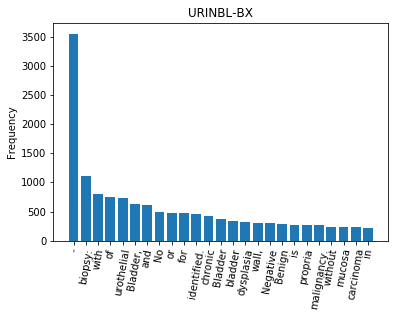



USBRSTNBX 

-                    27292
of                    6151
with                  6019
score:                4167
and                   3966
core                  3796
biopsy:               3766
o'clock,              3544
needle                3270
breast                3269
tumor                 3007
ultrasound-guided     2941
3.                    2910
breast,               2507
by                    2428
in                    2406
grade                 2047
ductal                2038
the                   2011
Breast,               1992
carcinoma             1992
score                 1959
3                     1918
at                    1870
Left                  1859
dtype: int64


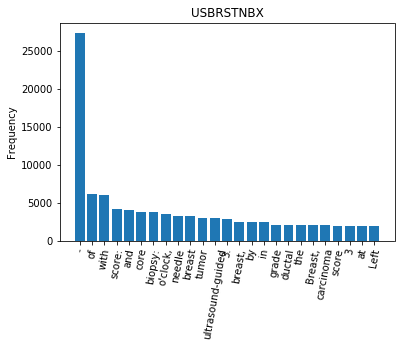



UT/TO-O 

-                 7461
and               3181
with              2636
fallopian         2113
Benign            1888
bilateral         1774
Uterus,            773
hysterectomy       760
tubes              742
for                685
tubes,             674
tubes:             565
Cervix:            560
Bilateral          554
Endometrium:       549
Myometrium:        539
Uterus             501
diagnostic         497
squamous           490
endometrium.       483
benign             476
proliferative      472
cervix,            453
salpingectomy:     449
abnormality.       432
dtype: int64


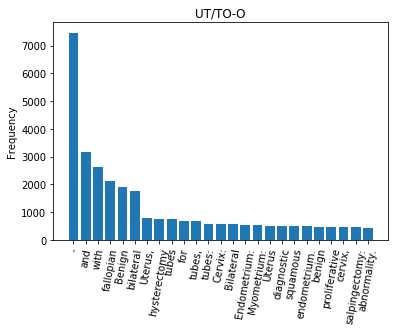



VAGBX 

-                  1293
biopsy:             513
squamous            390
with                385
Vaginal             346
and                 309
for                 273
of                  237
dysplasia           230
Negative            194
mucosa              194
or                  179
Benign              169
malignancy.         168
vaginal             158
Vagina,             149
See                 119
intraepithelial     104
No                  104
mild                 99
granulation          95
tissue               91
Squamous             90
chronic              89
identified.          86
dtype: int64


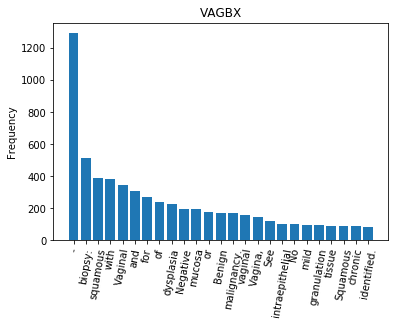



VULVBX 

-              2594
biopsy:        1236
with            737
and             676
Vulva,          502
for             479
dysplasia       457
or              431
Skin,           417
squamous        389
vulva,          377
Negative        340
See             314
chronic         294
Vulvar          292
of              279
malignancy.     276
Benign          265
No              240
comment.        237
by              217
A.              216
This            198
reviewed        197
case            197
dtype: int64


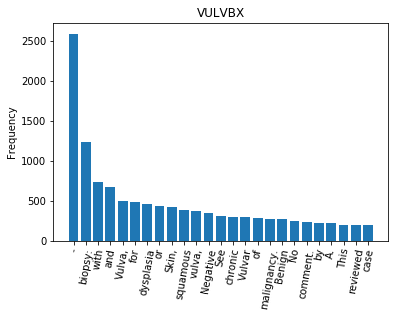

<Figure size 432x288 with 0 Axes>

In [20]:
for label in unique_labels.index:
    print(label,'\n')
    sf = data.sectionValue[label]
    temp = pd.DataFrame({'examCode':sf.index, 'sectionValue':sf.values})
    word_Index = generateWordIndex(temp)
    generateReport(word_Index, label)
    print('\n')
    